In [3]:
! pip install --quiet umap-learn hdbscan

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

! conda install -c rdkit rdkit -y

     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 6.4 MB 22.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
--2021-12-21 01:46:17--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   230MB/s    in 0.4s    

2021-12-21 01:46:17 (230 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan #

# PART 1: Molnet BACE1 dataset analysis

In [4]:
from typing import List

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem, DataStructs
from rdkit.Chem.rdchem import Mol
from rdkit.Chem.MolStandardize.rdMolStandardize import LargestFragmentChooser

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import hdbscan

# Silence non-critical RDKit warnings to minimize unnecessary outputs
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [5]:

def get_largest_fragment_from_smiles(s: str):
    mol = Chem.MolFromSmiles(s)
    if mol:
        clean_mol = LargestFragmentChooser().choose(mol)
        return Chem.MolToSmiles(clean_mol)
    return None


def compute_ecfp_descriptors(smiles_list: List[str]):
    """ Computes ecfp descriptors """
    
    keep_idx = []
    descriptors = []
    for i, smiles in enumerate(smiles_list):
        ecfp = _compute_single_ecfp_descriptor(smiles)
        if ecfp is not None:
            keep_idx.append(i)
            descriptors.append(ecfp)

    return np.vstack(descriptors), keep_idx

def _compute_single_ecfp_descriptor(smiles: str):
    try:
        mol = Chem.MolFromSmiles(smiles)
    except Exception as E:
        return None
    if mol:
        fp = Chem.AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        return np.array(fp)   
    return None

In [6]:
def plot_global_embeddings_with_clusters(df: pd.DataFrame,
                          x_col: str,
                          y_col: str,
                          cluster_col: str,
                          title: str = "",
                          x_lim = None,
                          y_lim = None):
    """ Plots data colored by soft HDBSCAN clusters
    
    If the cluster of a compund is not specified (cluster < 0), it will be
    plotted gray, otherwise it will be colored by the cluster value.
    """
    clustered = df[cluster_col].values >= 0
    
    plt.figure(figsize=(10,8))
    ax=sns.scatterplot(data=df.iloc[~clustered],
                    x=x_col,
                    y=y_col,
                    color=(0.5, 0.5, 0.5),
                    s=10,
                    alpha=0.1)
    sns.scatterplot(data=df.iloc[clustered],
                    x=x_col,
                    y=y_col,
                    hue=cluster_col,
                    alpha=0.5,
                    palette="nipy_spectral",
                    ax=ax)
    if x_lim:
      ax.set_xlim(x_lim)
    if y_lim:
      ax.set_ylim(y_lim)

    sm = plt.cm.ScalarMappable(cmap="nipy_spectral")
    sm.set_array([])
    ax.get_legend().remove()
    ax.figure.colorbar(sm, label="Global Cluster")
  
    plt.title(title)
    plt.show()

In [ ]:
! ls

Miniconda3-py37_4.8.2-Linux-x86_64.sh	molnet_bace1_train_RandomSplitter.csv
molnet_bace1_test_ButinaSplitter.csv	molnet_bace1_train_ScaffoldSplitter.csv
molnet_bace1_test_RandomSplitter.csv	molnet_bace.csv
molnet_bace1_test_ScaffoldSplitter.csv	sample_data
molnet_bace1_train_ButinaSplitter.csv


molnet_bace.csv


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


molnet_bace1_train_RandomSplitter.csv


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


molnet_bace1_train_ScaffoldSplitter.csv


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


molnet_bace1_train_ButinaSplitter.csv


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


molnet_bace1_test_RandomSplitter.csv


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


molnet_bace1_test_ScaffoldSplitter.csv


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


molnet_bace1_test_ButinaSplitter.csv


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


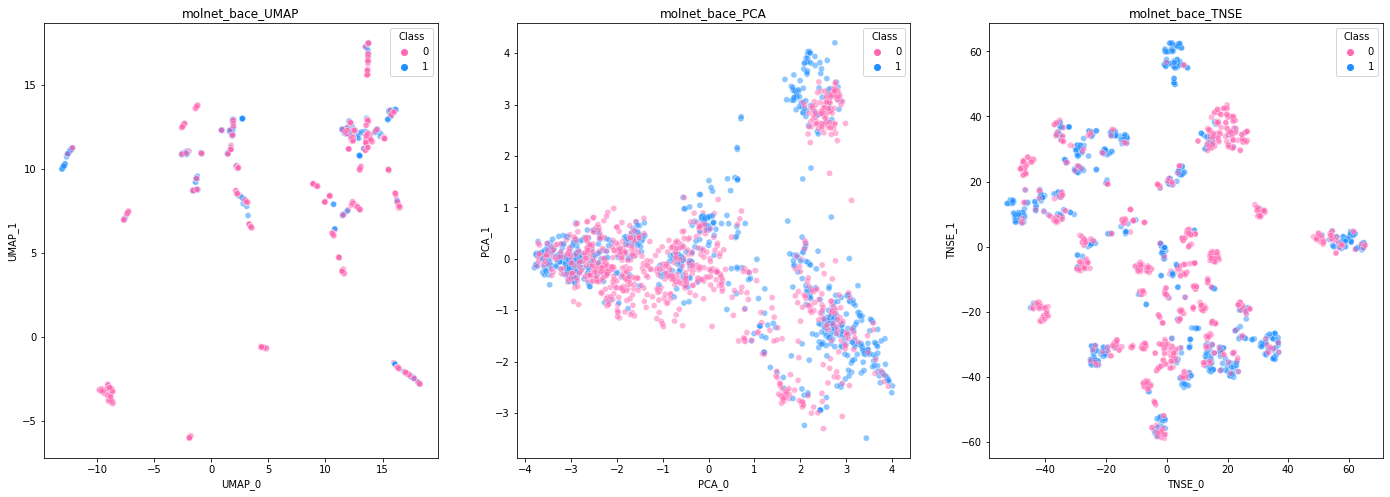

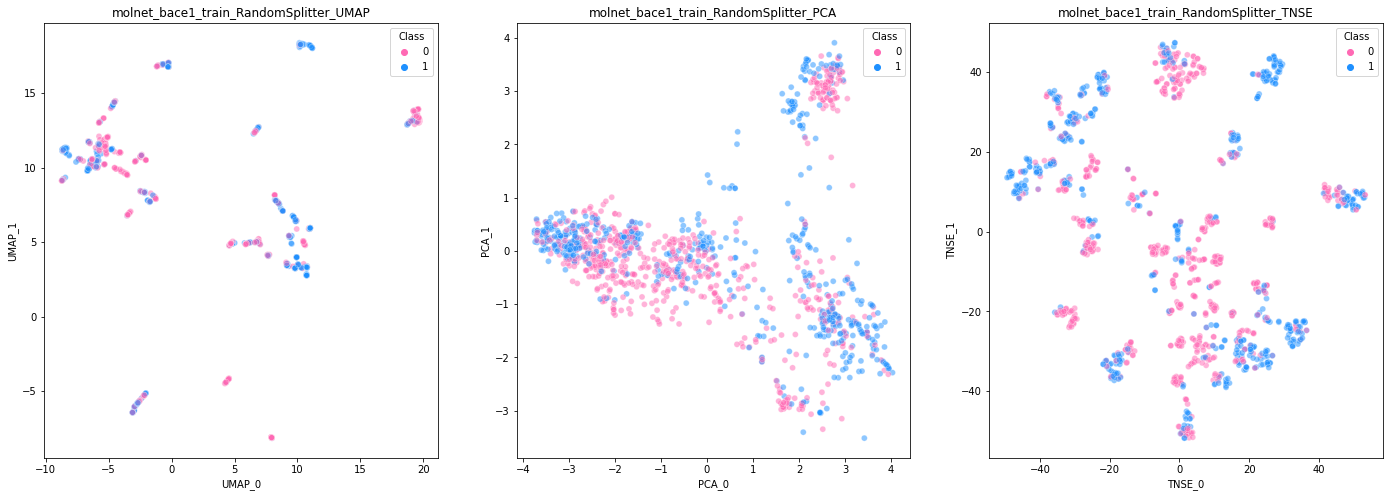

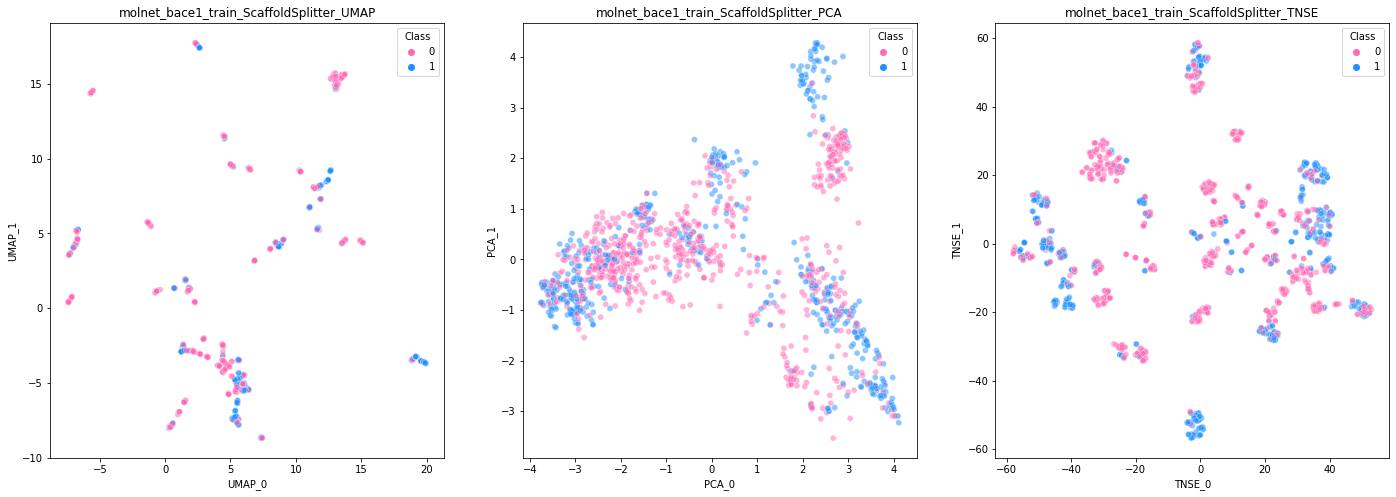

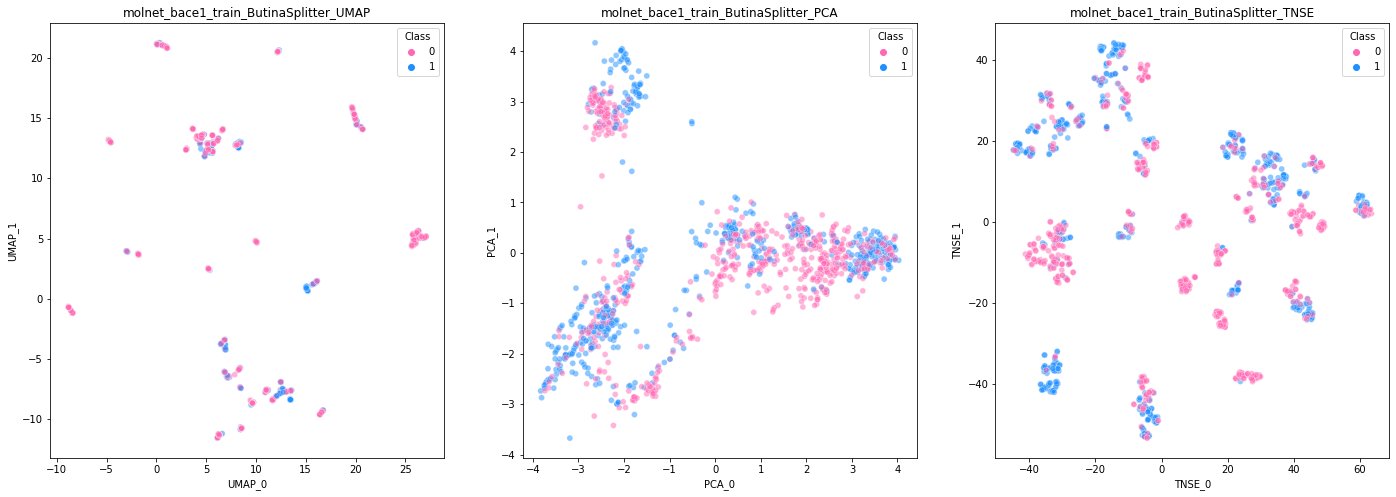

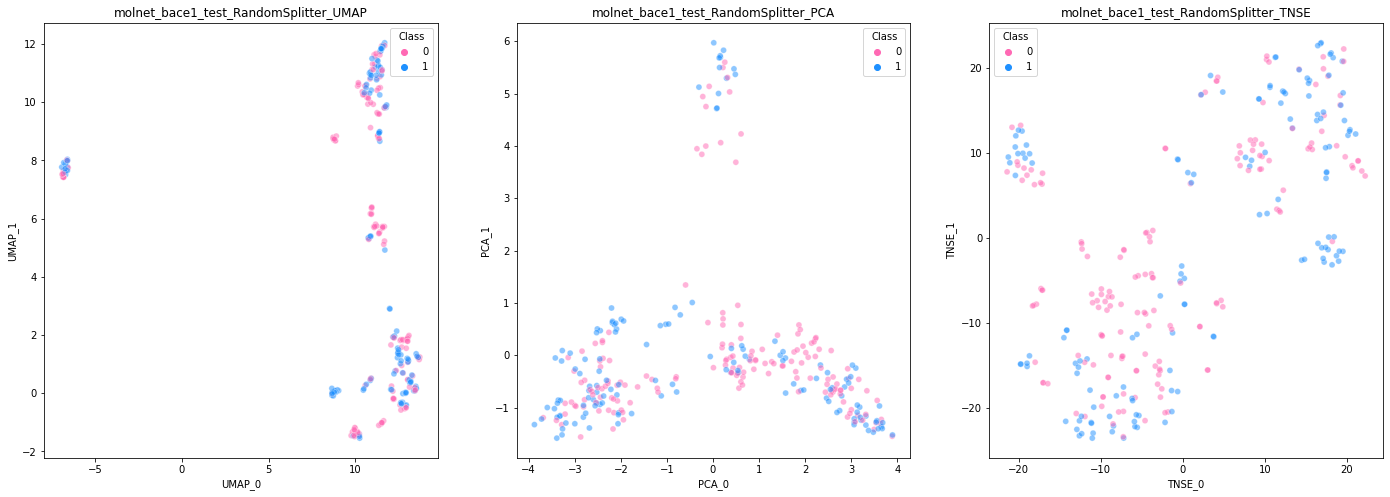

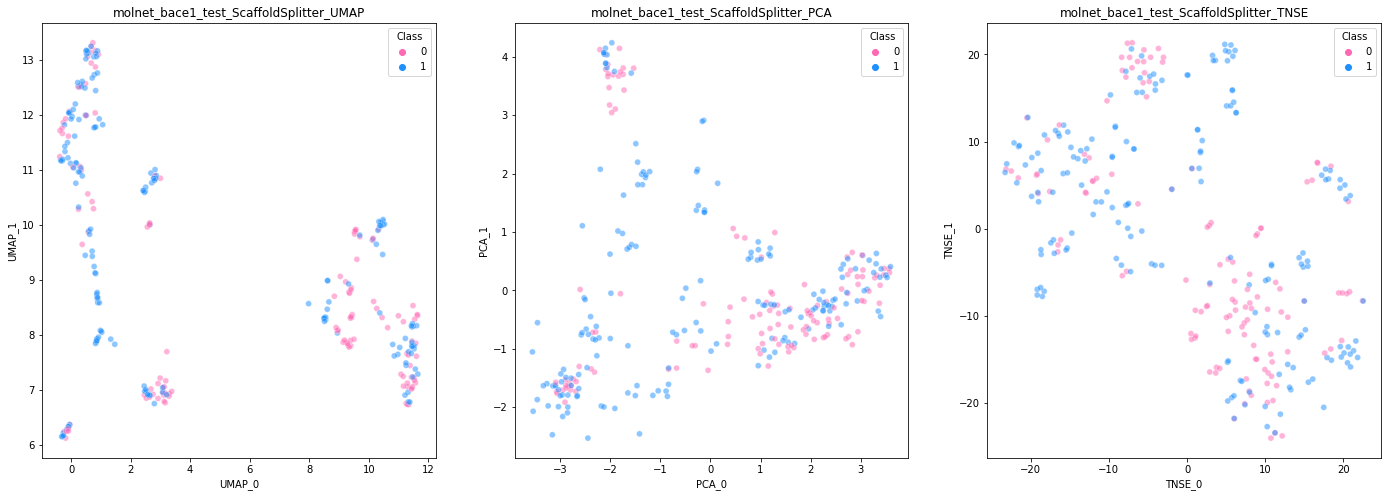

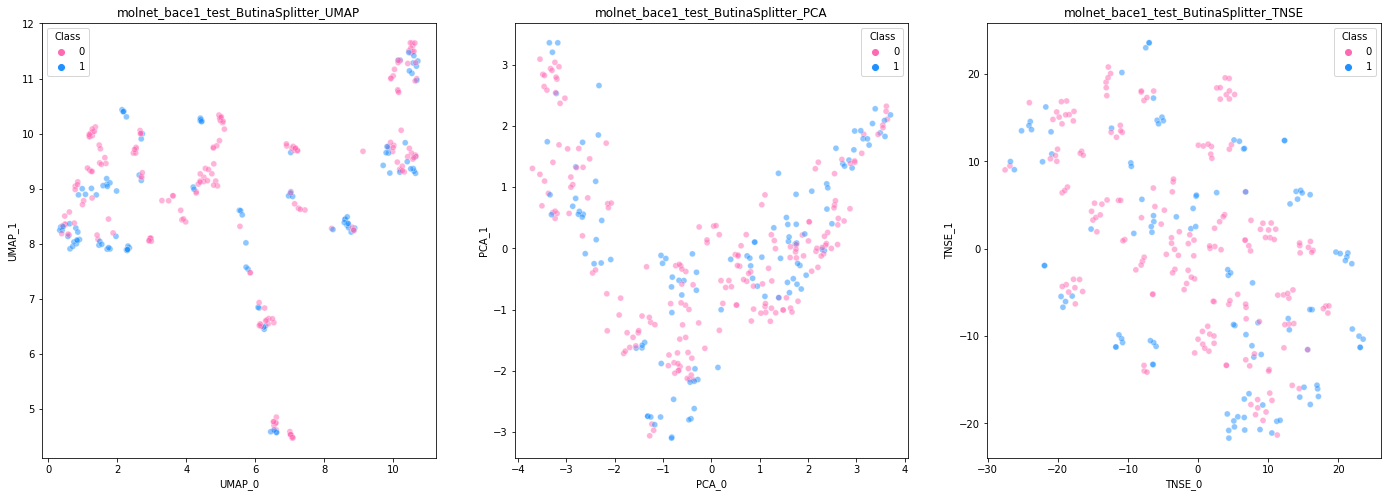

In [ ]:
files = ['molnet_bace.csv', 'molnet_bace1_train_RandomSplitter.csv', 'molnet_bace1_train_ScaffoldSplitter.csv', 'molnet_bace1_train_ButinaSplitter.csv', 'molnet_bace1_test_RandomSplitter.csv', 'molnet_bace1_test_ScaffoldSplitter.csv','molnet_bace1_test_ButinaSplitter.csv']


for fin in files:
  print(fin)
  # read data
  df = pd.read_csv(fin)
  # Remove extra fragments in SMILES (typically salts, which are irrelevant to BBB permeability)
  df["mol"] = df["mol"].apply(get_largest_fragment_from_smiles).dropna()
  # Compute desrciptors and keep track of which failed to featurize
  ecfp_descriptors, keep_idx = compute_ecfp_descriptors(df["mol"])
  # Only keep those that sucessfully featurized
  df = df.iloc[keep_idx]

  # umap
  umap_model = umap.UMAP(metric = "jaccard", n_neighbors = 25, n_components = 2, low_memory = False, min_dist = 0.001)
  X_umap = umap_model.fit_transform(ecfp_descriptors)
  df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]
  # PCA
  pca = PCA(n_components=2)
  X_pca = pca.fit_transform(ecfp_descriptors)
  df["PCA_0"], df["PCA_1"] = X_pca[:,0], X_pca[:,1]
  # t-SNE
  tsne = TSNE(n_components=2)
  X_tsne = tsne.fit_transform(ecfp_descriptors)
  df["TNSE_0"], df["TNSE_1"] = X_tsne[:,0], X_tsne[:,1]

  file_name = fin.replace('.csv', '')
  fig, axes = plt.subplots(1, 3, figsize=(24, 8))
  palette = sns.color_palette(["hotpink", "dodgerblue"])
  sns.scatterplot(data=df,x=df["UMAP_0"], y=df["UMAP_1"],hue="Class",alpha=0.5,palette=palette, ax=axes[0])
  axes[0].set_title(file_name + '_UMAP')
  sns.scatterplot(data=df,x=df["PCA_0"], y=df["PCA_1"],hue="Class",alpha=0.5,palette=palette, ax=axes[1])
  axes[1].set_title(file_name + '_PCA')
  sns.scatterplot(data=df,x=df["TNSE_0"], y=df["TNSE_1"],hue="Class",alpha=0.5,palette=palette, ax=axes[2])
  axes[2].set_title(file_name + '_TNSE')





# PART 2: Embed dataset in Global Chemical Space Approximation (Dataset-Agnostic Embedding) (this version could be deleted since there is an updated version already)

In [ ]:
# Read in data from MoleculeNet
chembl = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/chembl_sparse.csv.gz", compression='gzip')
# Sample a random 10k
chembl_sample = chembl.sample(n=100000)
# Compute desrciptors and keep track of which failed to featurize
chembl_ecfp_descriptors, chembl_keep_idx = compute_ecfp_descriptors(chembl_sample["smiles"])
# Only keep those that sucessfully featurized
chembl_sample = chembl_sample.iloc[chembl_keep_idx]

In [ ]:
df_molnet_bace = pd.read_csv('molnet_bace.csv')
df_molnet_bace["mol"] = df_molnet_bace["mol"].apply(get_largest_fragment_from_smiles).dropna()
ecfp_descriptors_molnet_bace, keep_idx = compute_ecfp_descriptors(df_molnet_bace["mol"])
#df_molnet_chembl = df_molnet_chembl.iloc[keep_idx]

df_chembl_bace = pd.read_csv('chembl_bace_bioactivity_data_processed.csv')
df_chembl_bace["canonical_smiles"] = df_chembl_bace["canonical_smiles"].apply(get_largest_fragment_from_smiles).dropna()
ecfp_descriptors_chembl_bace, keep_idx = compute_ecfp_descriptors(df_chembl_bace["canonical_smiles"])


df_chembl_cdk2 = pd.read_csv('chembl_cdk2_bioactivity_data_processed.csv')
df_chembl_cdk2["canonical_smiles"] = df_chembl_cdk2["canonical_smiles"].apply(get_largest_fragment_from_smiles).dropna()
ecfp_descriptors_chembl_cdk2, keep_idx = compute_ecfp_descriptors(df_chembl_cdk2["canonical_smiles"])

df_chembl_ach = pd.read_csv('chembl_acetylcholinesterase_bioactivity_data_processed.csv')
df_chembl_ach["canonical_smiles"] = df_chembl_ach["canonical_smiles"].apply(get_largest_fragment_from_smiles).dropna()
ecfp_descriptors_chembl_ach, keep_idx = compute_ecfp_descriptors(df_chembl_ach["canonical_smiles"])

In [ ]:
umap_model_global = umap.UMAP(metric = "jaccard", n_neighbors = 25, n_components = 2, low_memory = False, min_dist = 0.001)
X_umap_global = umap_model_global.fit_transform(chembl_ecfp_descriptors)
chembl_sample["UMAP_0"], chembl_sample["UMAP_1"] = X_umap_global[:,0], X_umap_global[:,1]

X_umap_molnet_bace = umap_model_global.transform(ecfp_descriptors_molnet_bace)
df_molnet_bace["UMAP_0 (global)"], df_molnet_bace["UMAP_1 (global)"] = X_umap_molnet_bace[:,0], X_umap_molnet_bace[:,1]

X_umap_chembl_bace = umap_model_global.transform(ecfp_descriptors_chembl_bace)
df_chembl_bace["UMAP_0 (global)"], df_chembl_bace["UMAP_1 (global)"] = X_umap_chembl_bace[:,0], X_umap_chembl_bace[:,1]

X_umap_chembl_cdk2 = umap_model_global.transform(ecfp_descriptors_chembl_cdk2)
df_chembl_cdk2["UMAP_0 (global)"], df_chembl_cdk2["UMAP_1 (global)"] = X_umap_chembl_cdk2[:,0], X_umap_chembl_cdk2[:,1]

X_umap_chembl_ach = umap_model_global.transform(ecfp_descriptors_chembl_ach)
df_chembl_ach["UMAP_0 (global)"], df_chembl_ach["UMAP_1 (global)"] = X_umap_chembl_ach[:,0], X_umap_chembl_ach[:,1]



/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


In [ ]:
# Define HDBSCAN model
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10, prediction_data=True, cluster_selection_method="eom")
# Fit and predict on ChEMBL-sample
chembl_sample["global_cluster"] = hdbscan_model.fit_predict(X_umap_global)
# Use ChEMBL-sample HDBSCAN model to cluster molnet bace data
df_molnet_bace["global_cluster"], _ = hdbscan.approximate_predict(hdbscan_model, np.nan_to_num(X_umap_molnet_bace, nan=0))
df_chembl_bace["global_cluster"], _ = hdbscan.approximate_predict(hdbscan_model, np.nan_to_num(X_umap_chembl_bace, nan=0))
df_chembl_cdk2["global_cluster"], _ = hdbscan.approximate_predict(hdbscan_model, np.nan_to_num(X_umap_chembl_cdk2, nan=0))
df_chembl_ach["global_cluster"], _ = hdbscan.approximate_predict(hdbscan_model, np.nan_to_num(X_umap_chembl_ach, nan=0))

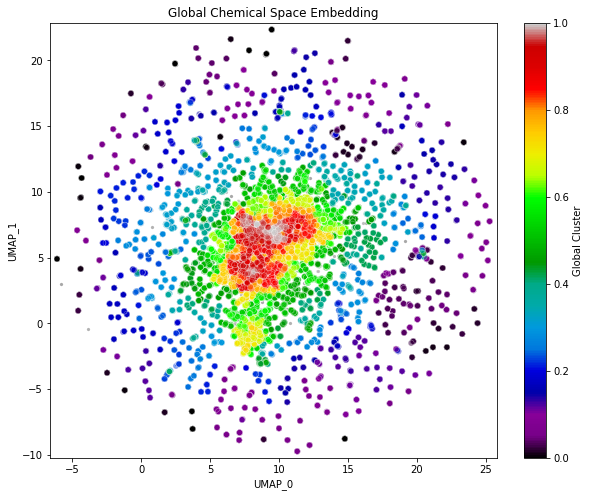

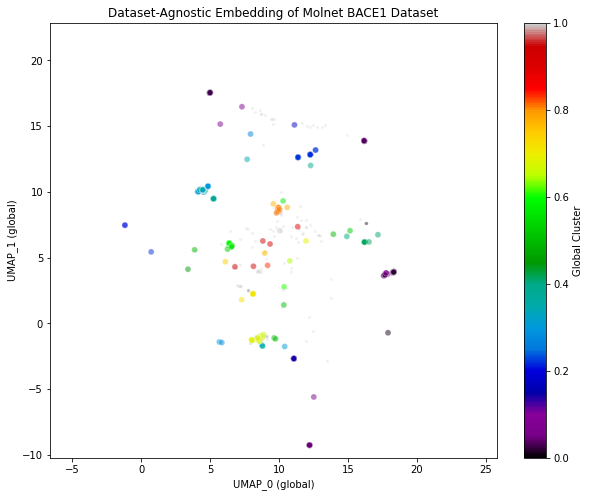

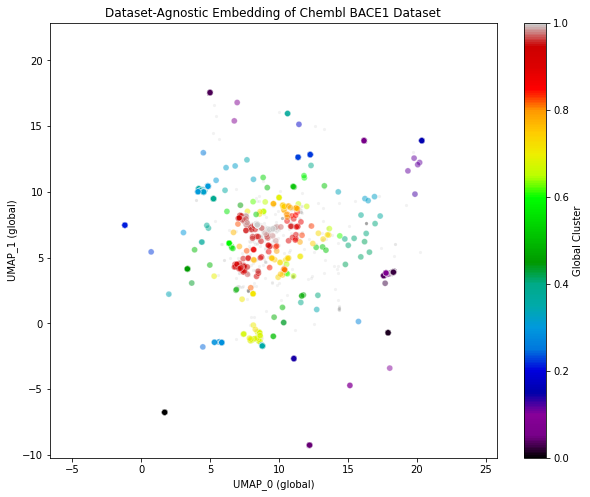

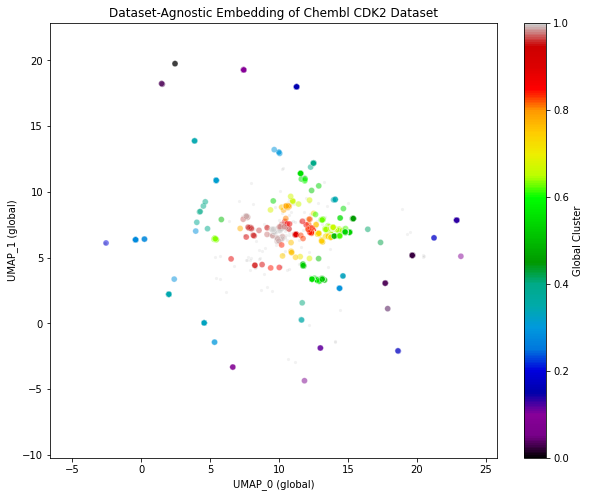

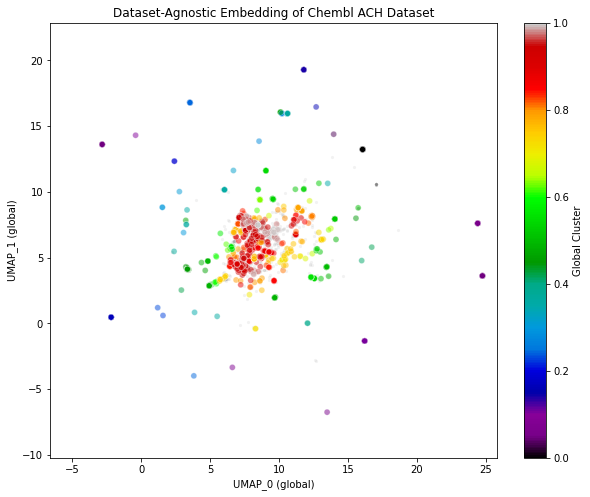

In [ ]:
# Determine axes limits to put plots on the same scale
buffer_space = 0.5 # Extra space around the edges
x_lim = chembl_sample["UMAP_0"].min()-buffer_space, chembl_sample["UMAP_0"].max()+buffer_space
y_lim = chembl_sample["UMAP_1"].min()-buffer_space, chembl_sample["UMAP_1"].max()+buffer_space

plot_global_embeddings_with_clusters(chembl_sample, x_col="UMAP_0", y_col="UMAP_1", x_lim=x_lim, y_lim=y_lim, cluster_col="global_cluster", title="Global Chemical Space Embedding")
plot_global_embeddings_with_clusters(df_molnet_bace, x_col="UMAP_0 (global)", y_col="UMAP_1 (global)", x_lim=x_lim, y_lim=y_lim, cluster_col="global_cluster", title="Dataset-Agnostic Embedding of Molnet BACE1 Dataset")
plot_global_embeddings_with_clusters(df_chembl_bace, x_col="UMAP_0 (global)", y_col="UMAP_1 (global)", x_lim=x_lim, y_lim=y_lim, cluster_col="global_cluster", title="Dataset-Agnostic Embedding of Chembl BACE1 Dataset")
plot_global_embeddings_with_clusters(df_chembl_cdk2, x_col="UMAP_0 (global)", y_col="UMAP_1 (global)", x_lim=x_lim, y_lim=y_lim, cluster_col="global_cluster", title="Dataset-Agnostic Embedding of Chembl CDK2 Dataset")
plot_global_embeddings_with_clusters(df_chembl_ach, x_col="UMAP_0 (global)", y_col="UMAP_1 (global)", x_lim=x_lim, y_lim=y_lim, cluster_col="global_cluster", title="Dataset-Agnostic Embedding of Chembl ACH Dataset")







# Analyze data in the chemical space, this is an updated version

In [7]:
# Read in data from MoleculeNet
chembl = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/chembl_sparse.csv.gz", compression='gzip')
# Sample a random 10k
chembl_sample = chembl.sample(n=100000)
# Compute desrciptors and keep track of which failed to featurize
chembl_ecfp_descriptors, chembl_keep_idx = compute_ecfp_descriptors(chembl_sample["smiles"])
# Only keep those that sucessfully featurized
chembl_sample = chembl_sample.iloc[chembl_keep_idx]

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


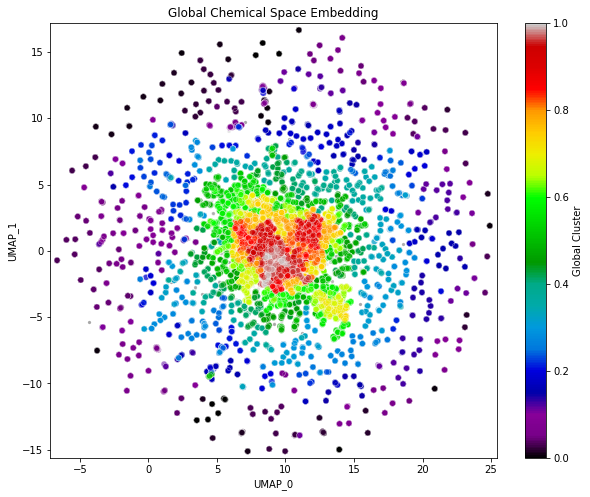

In [10]:
files = ['molnet_bace.csv', 'chembl_bace_bioactivity_data_processed.csv', 'chembl_cdk2_bioactivity_data_processed.csv', 'chembl_acetylcholinesterase_bioactivity_data_processed.csv']

umap_model_global = umap.UMAP(metric = "jaccard", n_neighbors = 25, n_components = 2, low_memory = False, min_dist = 0.001)
X_umap_global = umap_model_global.fit_transform(chembl_ecfp_descriptors)
chembl_sample["UMAP_0"], chembl_sample["UMAP_1"] = X_umap_global[:,0], X_umap_global[:,1]
# Define HDBSCAN model
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10, prediction_data=True, cluster_selection_method="eom")
# Fit and predict on ChEMBL-sample
chembl_sample["global_cluster"] = hdbscan_model.fit_predict(X_umap_global)
# Determine axes limits to put plots on the same scale
buffer_space = 0.5 # Extra space around the edges
x_lim = chembl_sample["UMAP_0"].min()-buffer_space, chembl_sample["UMAP_0"].max()+buffer_space
y_lim = chembl_sample["UMAP_1"].min()-buffer_space, chembl_sample["UMAP_1"].max()+buffer_space
plot_global_embeddings_with_clusters(chembl_sample, x_col="UMAP_0", y_col="UMAP_1", x_lim=x_lim, y_lim=y_lim, cluster_col="global_cluster", title="Global Chemical Space Embedding")


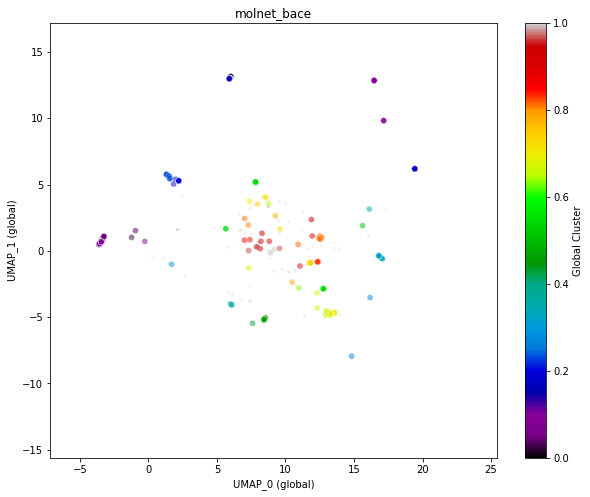

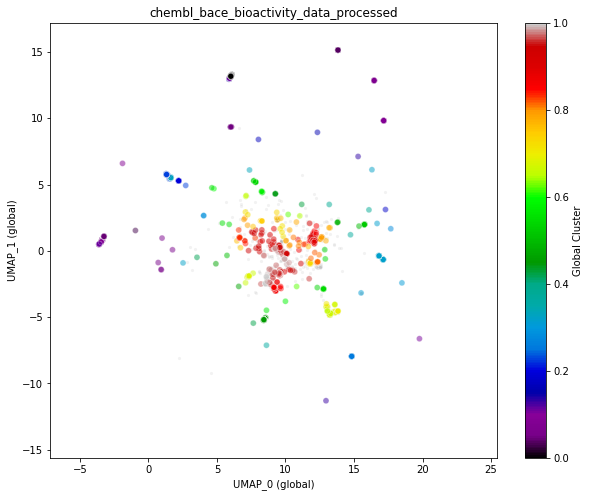

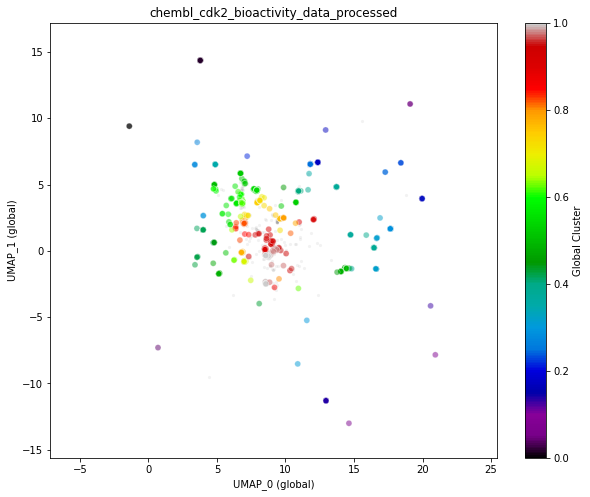

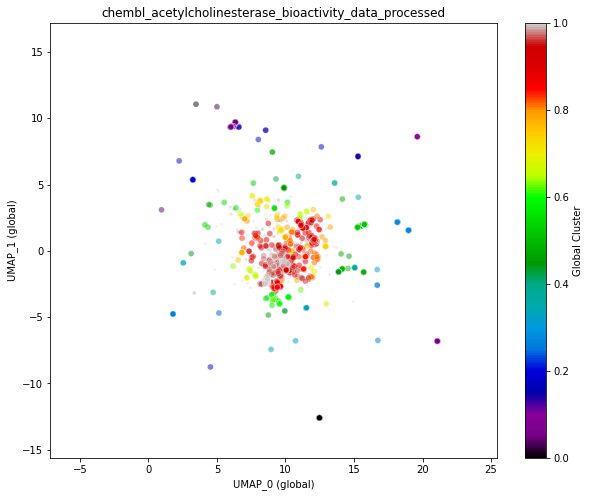

In [12]:
for fin in files:
	df = pd.read_csv(fin)
	if fin == 'molnet_bace.csv':		
		df["mol"] = df["mol"].apply(get_largest_fragment_from_smiles).dropna()
		ecfp_descriptors, keep_idx = compute_ecfp_descriptors(df["mol"])
	else:
		df["canonical_smiles"] = df["canonical_smiles"].apply(get_largest_fragment_from_smiles).dropna()
		ecfp_descriptors, keep_idx = compute_ecfp_descriptors(df["canonical_smiles"])
	X_umap = umap_model_global.transform(ecfp_descriptors)
	df["UMAP_0 (global)"], df["UMAP_1 (global)"] = X_umap[:,0], X_umap[:,1]
	df["global_cluster"], _ = hdbscan.approximate_predict(hdbscan_model, np.nan_to_num(X_umap, nan=0))
	plot_global_embeddings_with_clusters(df, x_col="UMAP_0 (global)", y_col="UMAP_1 (global)", x_lim=x_lim, y_lim=y_lim, cluster_col="global_cluster", title=fin.replace('.csv', ''))

